In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from flask import Flask, render_template, request


In [ ]:
from tensorflow.keras import models, layers

In [ ]:
image_size=256
batch_size=32

In [ ]:
df=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/archive/tea sickness dataset',shuffle=True,
                                                   image_size = (image_size,image_size),
                                                   batch_size=batch_size)

Found 885 files belonging to 8 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dF_class=df.class_names

In [ ]:
dF_class

In [ ]:
len(df)

28

In [ ]:
28*32

896

In [ ]:
for image_batch,label_batch in df.take(1):
    print(image_batch[0].numpy)
    print(label_batch[0])

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[218.5, 190.5, 175. ],
        [221.5, 191. , 177.5],
        [221.5, 189.5, 177.5],
        ...,
        [255. , 255. , 255. ],
        [255. , 255. , 255. ],
        [255. , 255. , 255. ]],

       [[222. , 189. , 176.5],
        [223.5, 189.5, 179.5],
        [223.5, 189.5, 179.5],
        ...,
        [255. , 255. , 255. ],
        [255. , 255. , 255. ],
        [255. , 255. , 255. ]],

       [[223. , 189. , 177. ],
        [222. , 189. , 178.5],
        [223. , 191. , 180. ],
        ...,
        [255. , 255. , 255. ],
        [255. , 255. , 255. ],
        [255. , 255. , 255. ]],

       ...,

       [[234. , 227. , 239.5],
        [231. , 228. , 239. ],
        [232. , 229. , 240. ],
        ...,
        [239. , 229. , 230. ],
        [237. , 226. , 227.5],
        [240. , 228. , 230. ]],

       [[232.5, 226.5, 237.5],
        [230. , 227. , 238. ],
        [231. , 228. , 239

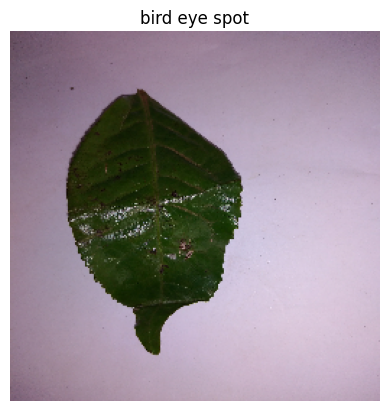

In [ ]:
for image_batch,label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(dF_class[label_batch[0]])
    plt.axis("off")

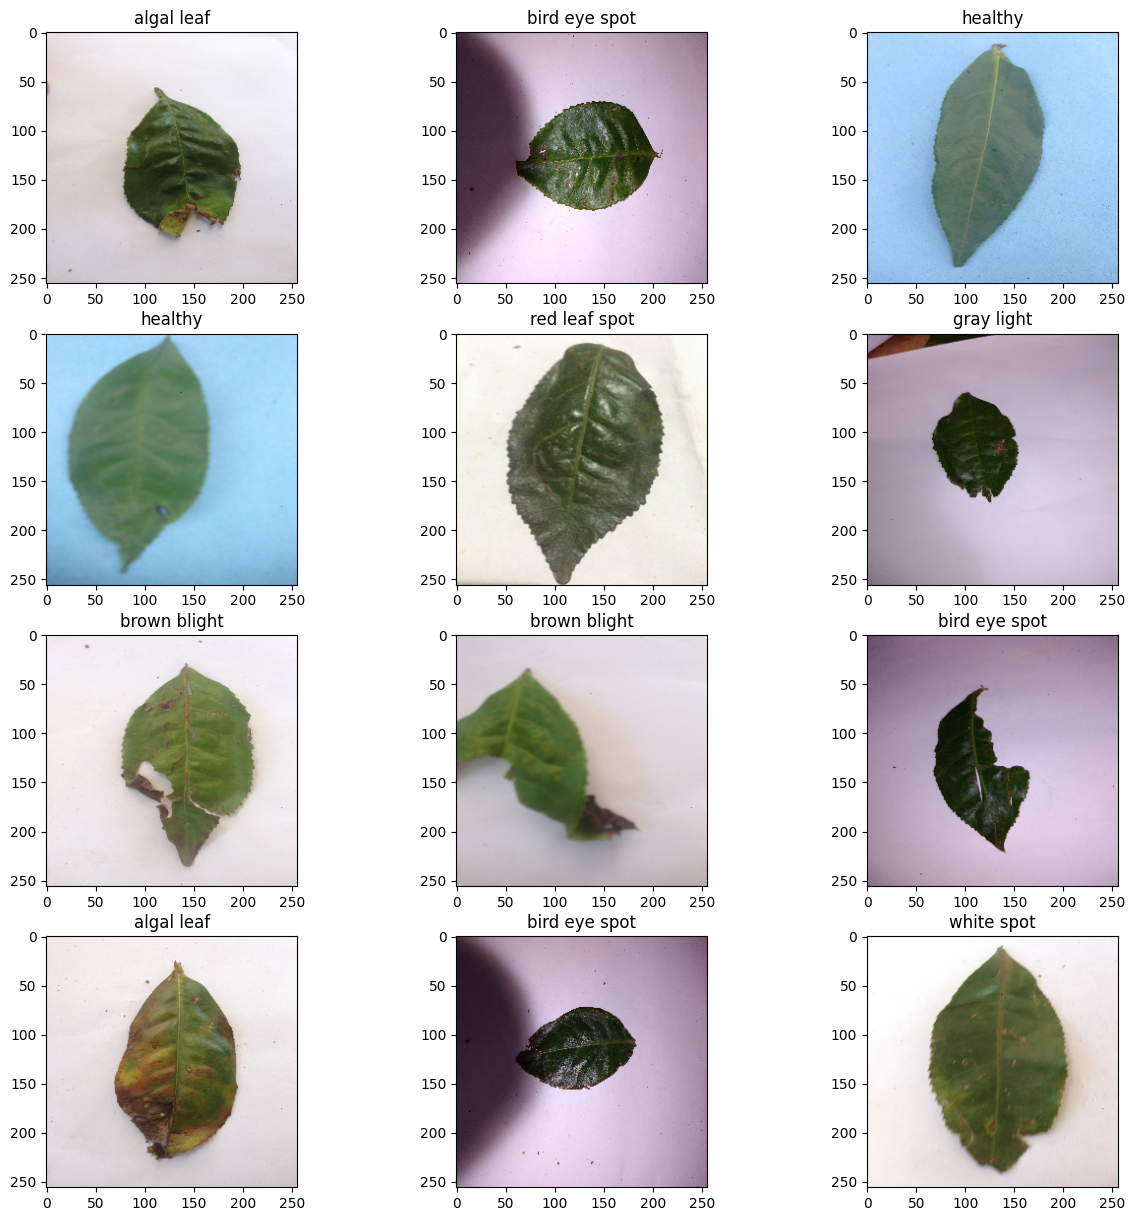

In [ ]:
#if i have to see multiple image with classs
#no of image is 12
plt.figure(figsize=(15,15))
for image_batch,label_batch in df.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(dF_class[label_batch[i]])

In [ ]:
def get_dateset_train_test(df,train_size=0.8,test_size=0.1,validation_size=0.1,shuffle=True,shuffle_size=1000):

    if shuffle:
        df=df.shuffle(shuffle_size,seed=12)

    df_size=len(df)
    tr_size=int(df_size*train_size)
    train_df=df.take(tr_size)

    val_s=int(df_size*validation_size)
    val_df=df.skip(tr_size).take(val_s)

    test_df=df.skip(tr_size).skip(val_s)




    return train_df,test_df,val_df

In [ ]:
train_df,test_df,val_df=get_dateset_train_test(df)

In [ ]:
len(train_df)

22

In [ ]:
len(test_df)

4

In [ ]:
len(val_df)

2

In [ ]:
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(batch_size,image_size,image_size,3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(8,activation='softmax')
])

In [ ]:
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_df,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_df
)

Epoch 1/30
22/22 [==============================] - 173s 1s/step - loss: 2.0141 - accuracy: 0.1414 - val_loss: 1.6489 - val_accuracy: 0.4375
Epoch 2/30
22/22 [==============================] - 1s 62ms/step - loss: 1.4581 - accuracy: 0.3564 - val_loss: 1.0982 - val_accuracy: 0.5312
Epoch 3/30
22/22 [==============================] - 1s 60ms/step - loss: 1.1574 - accuracy: 0.4820 - val_loss: 1.1414 - val_accuracy: 0.4219
Epoch 4/30
22/22 [==============================] - 1s 60ms/step - loss: 1.1165 - accuracy: 0.4993 - val_loss: 0.9429 - val_accuracy: 0.6094
Epoch 5/30
22/22 [==============================] - 1s 61ms/step - loss: 0.9804 - accuracy: 0.5887 - val_loss: 0.7719 - val_accuracy: 0.6875
Epoch 6/30
22/22 [==============================] - 1s 62ms/step - loss: 1.0105 - accuracy: 0.5498 - val_loss: 0.7288 - val_accuracy: 0.7656
Epoch 7/30
22/22 [==============================] - 1s 64ms/step - loss: 0.8829 - accuracy: 0.6205 - val_loss: 0.7179 - val_accuracy: 0.6250
Epoch 8/30
22

In [ ]:
model.history

In [ ]:
score=model.evaluate(test_df)

4/4 [==============================] - 0s 30ms/step - loss: 0.2448 - accuracy: 0.9062


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.14141413569450378,
 0.3564213514328003,
 0.4819624722003937,
 0.4992784857749939,
 0.588744580745697,
 0.5497835278511047,
 0.6204906105995178,
 0.6378066539764404,
 0.7344877123832703,
 0.7258297204971313,
 0.747474730014801,
 0.7691197395324707,
 0.8210678100585938,
 0.7604617476463318,
 0.7676767706871033,
 0.728715717792511,
 0.8239538073539734,
 0.8398268222808838,
 0.8354978561401367,
 0.8556998372077942,
 0.887445867061615,
 0.893217921257019,
 0.8845598697662354,
 0.8975468873977661,
 0.8989899158477783,
 0.9249639511108398,
 0.9552669525146484,
 0.9552669525146484,
 0.9567099809646606,
 0.9754689931869507]

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'training and validation accuracy')

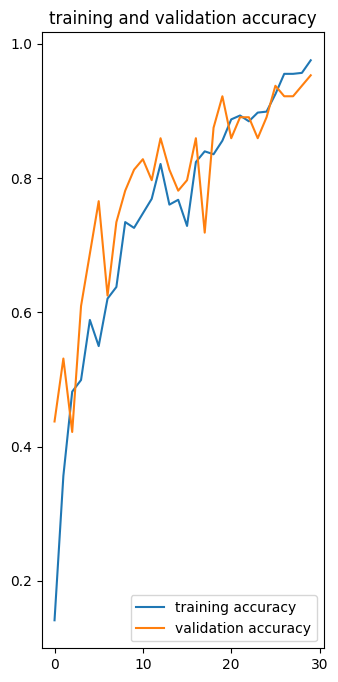

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(30),acc,label='training accuracy')
plt.plot(range(30),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

In [ ]:
import numpy as np

first images to predict
actual label :  white spot
1/1 [==============================] - 0s 145ms/step
predicted label white spot


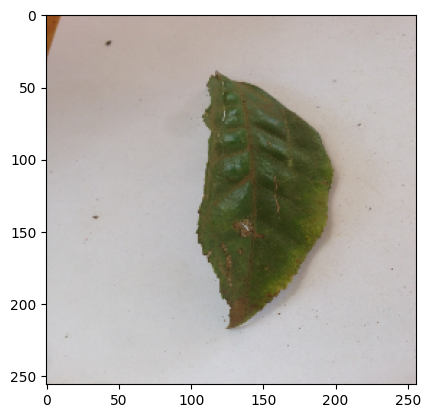

In [ ]:
for image_batch, labels_batch in test_df.take(1):
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= labels_batch[0].numpy()

    print("first images to predict")
    plt.imshow(first_image)
    print('actual label : ',dF_class[first_label])

    batch_prediction=model.predict(image_batch)
    print('predicted label',dF_class[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creating the batch

    prediction = model.predict(img_array)

    pre_class= dF_class[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return pre_class , confidence

1/1 [==============================] - 0s 18ms/step


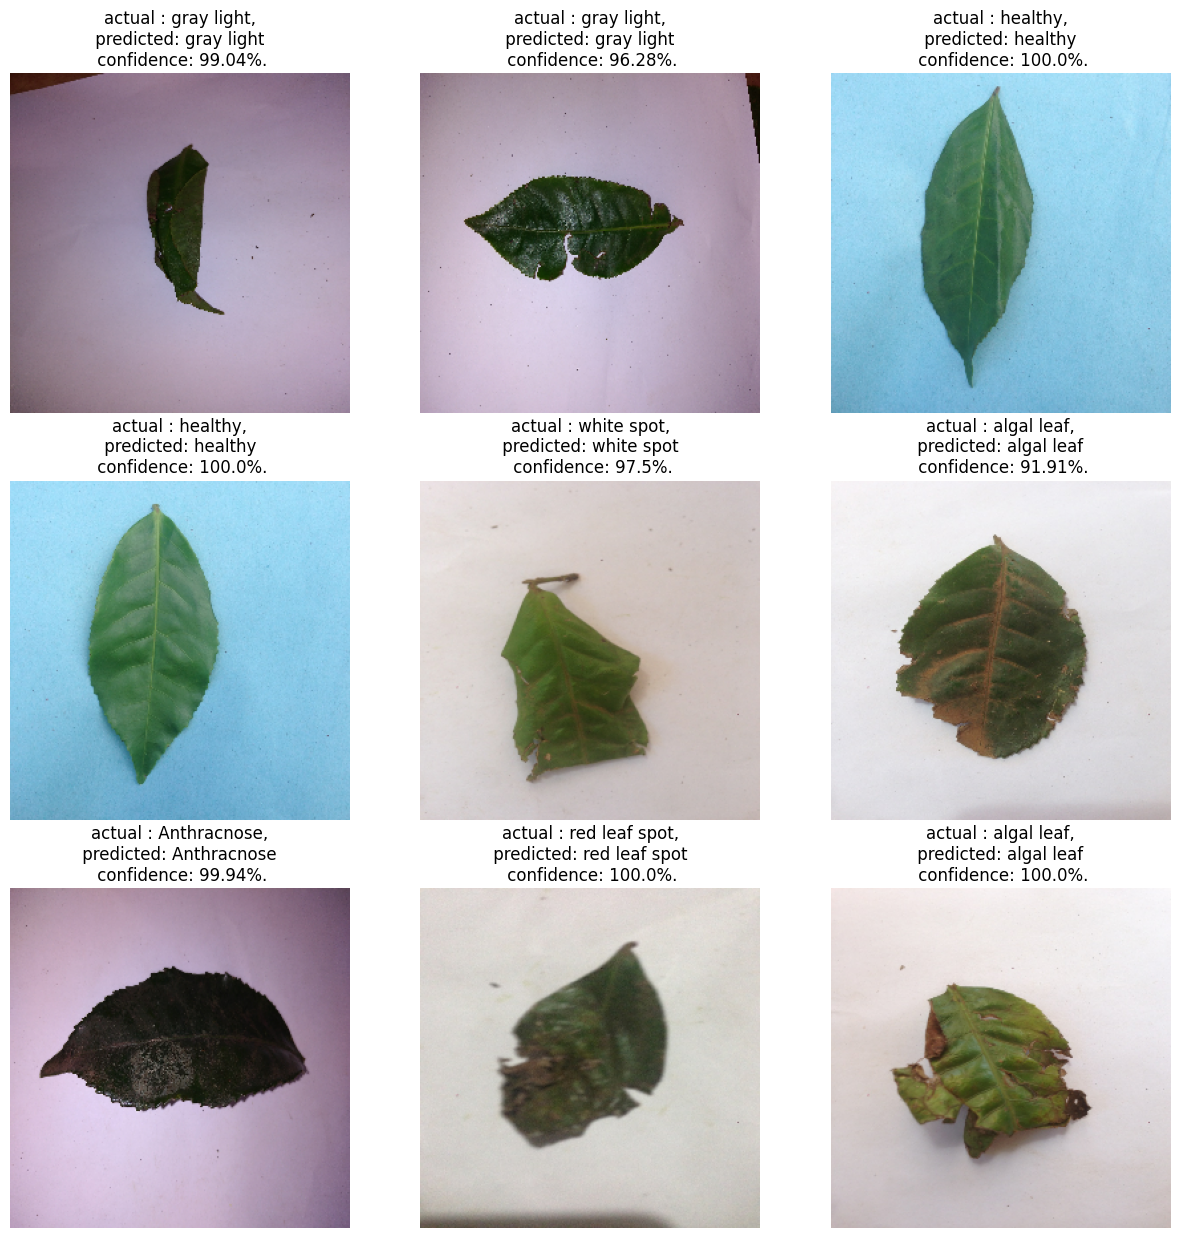

In [ ]:
plt.figure(figsize=(15,15))
for image , label in test_df.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))

        prediction_class , confidence= predict(model,image[i].numpy())
        actual_class=dF_class[label[i]]
        plt.title(f"actual : {actual_class},\n predicted: {prediction_class} \n confidence: {confidence}%.")
        plt.axis('off')

In [ ]:
pre = predict(model,test_df)

1/1 [==============================] - 0s 17ms/step


In [ ]:
pre

('algal leaf', 100.0)

In [ ]:
y_pred = model.predict(df)

28/28 [==============================] - 24s 647ms/step


In [ ]:
y_pred


array([[3.98451668e-15, 9.99996543e-01, 1.50357462e-14, ...,
        4.10727485e-12, 1.33456601e-09, 1.63736922e-06],
       [1.38454197e-03, 1.54914519e-11, 9.94058251e-01, ...,
        6.23094715e-14, 4.08677053e-13, 3.76826703e-19],
       [9.99572814e-01, 2.26859564e-14, 1.27472740e-05, ...,
        2.26675970e-12, 2.07715454e-15, 5.33891061e-16],
       ...,
       [1.09269039e-12, 5.02346840e-04, 3.38333333e-12, ...,
        5.61143398e-09, 7.71685663e-05, 1.33236181e-02],
       [2.25417035e-23, 1.00498673e-30, 1.36752921e-26, ...,
        1.00000000e+00, 0.00000000e+00, 3.10431851e-36],
       [9.99989867e-01, 1.23663437e-20, 1.00970055e-05, ...,
        1.12884304e-17, 8.23828480e-16, 1.46100675e-21]], dtype=float32)

In [ ]:
# confusion_matrix

from sklearn.metrics import confusion_matrix

In [ ]:
def predict1(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creating the batch

    prediction = model.predict(img_array)

    pre_class= dF_class[np.argmax(prediction[0])]
#     confidence = round(100*(np.max(prediction[0])),2)
    return pre_class

In [ ]:
for image,label in df.take(28):
    for i in range(32):
        pred_class = predict1(model,image[i].numpy())
        actual_class = dF_class[label[i]]
        print(actual_class)
        print(pred_class)

1/1 [==============================] - 0s 25ms/step
red leaf spot
red leaf spot
1/1 [==============================] - 0s 28ms/step
gray light
gray light
1/1 [==============================] - 0s 63ms/step
brown blight
brown blight
1/1 [==============================] - 0s 30ms/step
Anthracnose
Anthracnose
1/1 [==============================] - 0s 47ms/step
algal leaf
algal leaf
1/1 [==============================] - 0s 33ms/step
red leaf spot
red leaf spot
1/1 [==============================] - 0s 24ms/step
red leaf spot
red leaf spot
1/1 [==============================] - 0s 38ms/step
algal leaf
algal leaf
1/1 [==============================] - 0s 23ms/step
gray light
gray light
1/1 [==============================] - 0s 63ms/step
brown blight
brown blight
1/1 [==============================] - 0s 59ms/step
gray light
gray light
1/1 [==============================] - 0s 31ms/step
algal leaf
algal leaf
1/1 [==============================] - 0s 61ms/step
algal leaf
algal leaf
1/1 [=====

InvalidArgumentError: ignored

In [ ]:
actual=[]
pre=[]
for image,label in df.take(28):
    for i in range(32):
        pred_class = predict1(model,image[i].numpy())
        actual_class = dF_class[label[i]]
        actual.append(actual_class)
        pre.append(pred_class)

1/1 [==============================] - 0s 17ms/step


InvalidArgumentError: ignored

In [ ]:
actual

['algal leaf',
 'brown blight',
 'healthy',
 'gray light',
 'algal leaf',
 'Anthracnose',
 'gray light',
 'red leaf spot',
 'bird eye spot',
 'white spot',
 'white spot',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'white spot',
 'Anthracnose',
 'bird eye spot',
 'white spot',
 'brown blight',
 'white spot',
 'algal leaf',
 'red leaf spot',
 'gray light',
 'Anthracnose',
 'algal leaf',
 'Anthracnose',
 'Anthracnose',
 'healthy',
 'bird eye spot',
 'brown blight',
 'bird eye spot',
 'Anthracnose',
 'bird eye spot',
 'bird eye spot',
 'algal leaf',
 'white spot',
 'algal leaf',
 'white spot',
 'healthy',
 'algal leaf',
 'white spot',
 'brown blight',
 'Anthracnose',
 'white spot',
 'Anthracnose',
 'red leaf spot',
 'red leaf spot',
 'algal leaf',
 'white spot',
 'bird eye spot',
 'Anthracnose',
 'white spot',
 'white spot',
 'red leaf spot',
 'white spot',
 'gray light',
 'white spot',
 'Anthracnose',
 'algal leaf',
 'algal leaf',
 'algal leaf',
 'algal leaf',
 'algal leaf',
 'alg

In [ ]:
pre

['algal leaf',
 'brown blight',
 'healthy',
 'gray light',
 'algal leaf',
 'Anthracnose',
 'Anthracnose',
 'red leaf spot',
 'bird eye spot',
 'white spot',
 'white spot',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'white spot',
 'Anthracnose',
 'bird eye spot',
 'white spot',
 'brown blight',
 'white spot',
 'algal leaf',
 'red leaf spot',
 'gray light',
 'Anthracnose',
 'algal leaf',
 'Anthracnose',
 'Anthracnose',
 'healthy',
 'bird eye spot',
 'brown blight',
 'bird eye spot',
 'Anthracnose',
 'bird eye spot',
 'bird eye spot',
 'algal leaf',
 'white spot',
 'algal leaf',
 'white spot',
 'healthy',
 'algal leaf',
 'white spot',
 'brown blight',
 'Anthracnose',
 'white spot',
 'Anthracnose',
 'red leaf spot',
 'red leaf spot',
 'algal leaf',
 'white spot',
 'bird eye spot',
 'Anthracnose',
 'brown blight',
 'white spot',
 'red leaf spot',
 'white spot',
 'Anthracnose',
 'white spot',
 'Anthracnose',
 'algal leaf',
 'algal leaf',
 'white spot',
 'algal leaf',
 'algal leaf',
 

In [ ]:
plt.figure(figsize=(15,15))
cm = confusion_matrix(actual,pre)
print(cm)

[[ 89   0   8   0   3   0   0   0]
 [  0 105   0   0   0   0   0   8]
 [  7   0  90   0   3   0   0   0]
 [  0   0   0 109   0   0   0   4]
 [  8   0   5   0  87   0   0   0]
 [  1   0   0   0   0  73   0   0]
 [  0   1   0   0   0   0 141   1]
 [  0   1   0   6   0   0   0 135]]


<Figure size 1500x1500 with 0 Axes>

<Axes: >

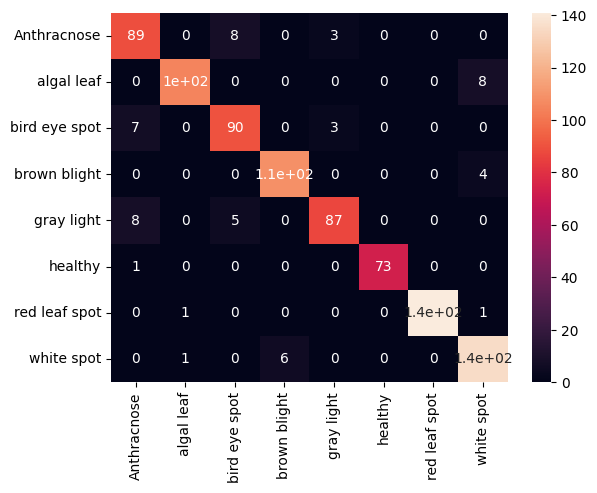

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,xticklabels=dF_class,yticklabels=dF_class)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(actual,pre))

               precision    recall  f1-score   support

  Anthracnose       0.85      0.89      0.87       100
   algal leaf       0.98      0.93      0.95       113
bird eye spot       0.87      0.90      0.89       100
 brown blight       0.95      0.96      0.96       113
   gray light       0.94      0.87      0.90       100
      healthy       1.00      0.99      0.99        74
red leaf spot       1.00      0.99      0.99       143
   white spot       0.91      0.95      0.93       142

     accuracy                           0.94       885
    macro avg       0.94      0.93      0.94       885
 weighted avg       0.94      0.94      0.94       885



In [ ]:
model_version =1
model.save(f'tea_leaf_model{model_version}')